In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import cufflinks as clf
clf.go_offline()

from sklearn.metrics import classification_report, f1_score, recall_score, confusion_matrix, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score

# Import data
## visualization

In [2]:
df = pd.read_csv("data/datasets_483_982_spam.csv", encoding="latin-1")

In [3]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)
df = df.rename(columns={"v1":"label","v2":"messages"})

In [4]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df["length"] = df["messages"].apply(len)

In [68]:
len(df)

5572

In [6]:
df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


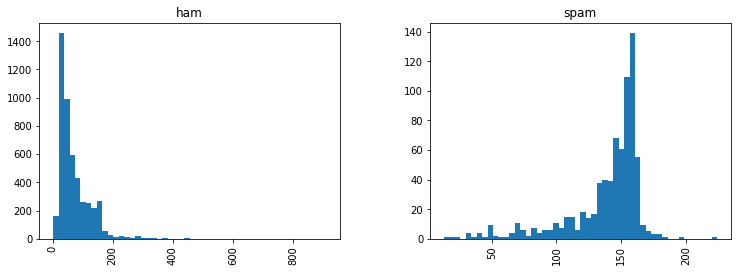

In [7]:
df.hist(column="length", by="label", bins=50, figsize=(12,4));

In [13]:
df["length"].iplot(kind="bar")

# Feature Engineering

In [14]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [15]:
count_vector = CountVectorizer(analyzer=text_process).fit(df["messages"])

In [16]:
print(len(count_vector.vocabulary_))

11304


In [17]:
message_vector = count_vector.transform(df["messages"])

In [18]:
print(message_vector.shape)

(5572, 11304)


In [19]:
tfidf_transformer = TfidfTransformer().fit(message_vector)

In [21]:
message_tfidf = tfidf_transformer.transform(message_vector)

# Modeling....

In [22]:
X = message_tfidf
y = df["label"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model=RandomForestClassifier()

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
m = model.score(X_test, y_test)

In [27]:
print("Accuracy of Spam message detection model:",m)

Accuracy of Spam message detection model: 0.9730941704035875


In [29]:
y_preds = model.predict(X_test)

In [32]:
np.mean(cross_val_score(model, X, y, scoring="accuracy", cv=5))

0.9685923146903253

In [33]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [35]:
conf = confusion_matrix(y_test, y_preds)

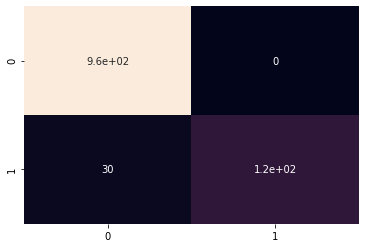

In [37]:
sns.heatmap(conf, annot=True, cbar=False);

In [40]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9730941704035875

In [55]:
f1 = f1_score(y_test, y_preds, pos_label="ham")
f1

0.9846938775510203

In [56]:
recall = recall_score(y_test, y_preds, pos_label="ham")
recall

1.0

In [57]:
precision = precision_score(y_test, y_preds, pos_label="ham")
precision

0.9698492462311558

In [61]:
score = pd.DataFrame({"Accuracy":accuracy,
                      "f1":f1,
                      "Recall":recall,
                      "Precision":precision},index=[0])

In [62]:
score

,Accuracy,f1,Recall,Precision
0,0.973094,0.984694,1.0,0.969849


In [64]:
score.T.iplot(kind="bar")